<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Function for First Looking to the Columns

In [3]:
def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

In [4]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values



# Data Gathering

In [5]:
df_0 = pd.read_csv("car_dataset.csv")

In [6]:
df = df_0.copy()

# Data Preparation

In [7]:
df.head(20)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.250,9.830,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.750,8.120,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.500,8.610,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.750,8.890,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.450,8.920,42367,Diesel,Dealer,Manual,0


In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
df.shape

(301, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
missing(df)

,Missing_Number,Missing_Percent
Car_Name,0,0.000
Year,0,0.000
Selling_Price,0,0.000
Present_Price,0,0.000
Kms_Driven,0,0.000
Fuel_Type,0,0.000
Seller_Type,0,0.000
Transmission,0,0.000
Owner,0,0.000


In [12]:
df.duplicated().sum()

2

In [13]:
df.duplicated().value_counts()

False    299
True       2
dtype: int64

In [14]:
df[df.duplicated() == True]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.750,10.790,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.000,30.610,40000,Diesel,Dealer,Automatic,0


In [15]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000,301.000,301.000,301.000,301.000
mean,2013.628,4.661,7.628,36947.206,0.043
std,2.892,5.083,8.644,38886.884,0.248
min,2003.000,0.100,0.320,500.000,0.000
25%,2012.000,0.900,1.200,15000.000,0.000
50%,2014.000,3.600,6.400,32000.000,0.000
75%,2016.000,6.000,9.900,48767.000,0.000
max,2018.000,35.000,92.600,500000.000,3.000


In [17]:
df[df["Transmission"] == "Manual"].count()

Car_Name         261
Year             261
Selling_Price    261
Present_Price    261
Kms_Driven       261
Fuel_Type        261
Seller_Type      261
Transmission     261
Owner            261
dtype: int64

In [15]:
df.describe(include=object)

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [16]:
df["Car_Name"].value_counts().index.sort_values()

Index(['800', 'Activa 3g', 'Activa 4g', 'Bajaj  ct 100', 'Bajaj Avenger 150',
       'Bajaj Avenger 150 street', 'Bajaj Avenger 220',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger Street 220',
       'Bajaj Discover 100', 'Bajaj Discover 125', 'Bajaj Dominar 400',
       'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 135 LS', 'Bajaj Pulsar 150',
       'Bajaj Pulsar 220 F', 'Bajaj Pulsar NS 200', 'Bajaj Pulsar RS200',
       'Hero  CBZ Xtreme', 'Hero  Ignitor Disc', 'Hero Extreme',
       'Hero Glamour', 'Hero Honda CBZ extreme', 'Hero Honda Passion Pro',
       'Hero Hunk', 'Hero Passion Pro', 'Hero Passion X pro',
       'Hero Splender Plus', 'Hero Splender iSmart', 'Hero Super Splendor',
       'Honda Activa 125', 'Honda Activa 4G', 'Honda CB Hornet 160R',
       'Honda CB Shine', 'Honda CB Trigger', 'Honda CB Unicorn',
       'Honda CB twister', 'Honda CBR 150', 'Honda Dream Yuga ',
       'Honda Karizma', 'Hyosung GT250R', 'KTM 390 Duke ', 'KTM RC200',
       'KTM RC390', 'Mahindra Mojo 

In [24]:
# df["Car_Name"] = df["Car_Name"].str.lower()

def replace_name(a, b):
    df["Car_Name"].replace(a, b, inplace=True)

replace_name('800','Auto,Suzuki,Alto')
replace_name('Activa 3g','Bike,Honda,Activa')
replace_name('Activa 4g','Bike,Honda,Activa')
replace_name('Bajaj  ct 100', 'Bike,Bajaj,CT')
replace_name('Bajaj Avenger 150','Bike,Bajaj,Avenger')
replace_name('Bajaj Avenger 150 street', 'Bike,Bajaj,Avenger')
replace_name('Bajaj Avenger 220', 'Bike,Bajaj,Avenger')
replace_name('Bajaj Avenger 220 dtsi', 'Bike,Bajaj,Avenger')
replace_name('Bajaj Avenger Street 220', 'Bike,Bajaj,Avenger')
replace_name('Bajaj Discover 100', 'Bike,Bajaj,Discover')
replace_name('Bajaj Discover 125', 'Bike,Bajaj,Discover')
replace_name('Bajaj Dominar 400', 'Bike,Bajaj,Dominar')
replace_name('Bajaj Pulsar  NS 200', 'Bike,Bajaj,Pulsar')
replace_name('Bajaj Pulsar 135 LS', 'Bike,Bajaj,Pulsar')
replace_name('Bajaj Pulsar 150', 'Bike,Bajaj,Pulsar')
replace_name('Bajaj Pulsar 220 F', 'Bike,Bajaj,Pulsar')
replace_name('Bajaj Pulsar NS 200', 'Bike,Bajaj,Pulsar')
replace_name('Bajaj Pulsar RS200', 'Bike,Bajaj,Pulsar')
replace_name('Hero  CBZ Xtreme', 'Bike,Hero,CBZ')
replace_name('Hero  Ignitor Disc', 'Bike,Hero,Ignitor')
replace_name('Hero Extreme', 'Bike,Hero,Extreme')
replace_name('Hero Glamour', 'Bike,Hero,Glamour')
replace_name('Hero Honda CBZ extreme', 'Bike,Hero,CBZ')
replace_name('Hero Honda Passion Pro', 'Bike,Hero,Passion')
replace_name('Hero Hunk', 'Bike,Hero,Hunk')
replace_name('Hero Passion Pro', 'Bike,Hero,Passion')
replace_name('Hero Passion X pro', 'Bike,Hero,Passion')
replace_name('Hero Splender Plus', 'Bike,Hero,Splender')
replace_name('Hero Splender iSmart', 'Bike,Hero,Splender')
replace_name('Hero Super Splendor', 'Bike,Hero,Splender')
replace_name('Honda Activa 125', 'Bike,Honda,Activa')
replace_name('Honda Activa 4G', 'Bike,Honda,Activa')
replace_name('Honda CB Hornet 160R', 'Bike,Honda,CB')
replace_name('Honda CB Shine', 'Bike,Honda,CB')
replace_name('Honda CB Trigger', 'Bike,Honda,CB')
replace_name('Honda CB Unicorn', 'Bike,Honda,CB')
replace_name('Honda CB twister', 'Bike,Honda,CB')
replace_name('Honda CBR 150', 'Bike,Honda,CB')
replace_name('Honda Dream Yuga ', 'Bike,Honda,Dream')
replace_name('Honda Karizma', 'Bike,Honda,Karizma')
replace_name('Hyosung GT250R', 'Bike,Hyosung,GT250R')
replace_name('KTM 390 Duke ', 'Bike,KTM,Duke')
replace_name('KTM RC200', 'Bike,KTM,RC')
replace_name('KTM RC390', 'Bike,KTM,RC')
replace_name('Mahindra Mojo XT300', 'Bike,Mahindra,Mojo')
replace_name('Royal Enfield Bullet 350', 'Bike,Royal Enfield,Bullet')
replace_name('Royal Enfield Classic 350', 'Bike,Royal Enfield,Classic')
replace_name('Royal Enfield Classic 500', 'Bike,Royal Enfield,Classic')
replace_name('Royal Enfield Thunder 350', 'Bike,Royal Enfield,Thunder')
replace_name('Royal Enfield Thunder 500', 'Bike,Royal Enfield,Thunder')
replace_name('Suzuki Access 125', 'Bike,Suzuki,Access')
replace_name('TVS Apache RTR 160', 'Bike,TVS,Apache')
replace_name('TVS Apache RTR 180', 'Bike,TVS,Apache')
replace_name('TVS Jupyter', 'Bike,TVS,Jupyter')
replace_name('TVS Sport ', 'Bike,TVS,Sport')
replace_name('TVS Wego', 'Bike,TVS,Wego')
replace_name('UM Renegade Mojave', 'Bike,UM Renegade,Mojave')
replace_name('Yamaha FZ  v 2.0', 'Bike,Yamaha,FZ')
replace_name('Yamaha FZ 16', 'Bike,Yamaha,FZ')
replace_name('Yamaha FZ S ', 'Bike,Yamaha,FZ')
replace_name('Yamaha FZ S V 2.0', 'Bike,Yamaha,FZ')
replace_name('Yamaha Fazer ', 'Bike,Yamaha,Fazer')
replace_name('alto 800', 'Auto,Suzuki,Alto')
replace_name('alto k10', 'Auto,Suzuki,Alto')
replace_name('amaze', 'Auto,Honda,Amaze')
replace_name('baleno', 'Auto,Suzuki,Baleno')
replace_name('brio', 'Auto,Honda,Brio')
replace_name('camry', 'Auto,Toyota,Camry')
replace_name('ciaz', 'Auto,Suzuki,Ciaz')    
replace_name('city', 'Auto,Honda,City')    
replace_name('corolla', 'Auto,Toyota,Corolla')
replace_name('corolla altis', 'Auto,Toyota,Corolla')   
replace_name('creta', 'Auto,Hyundai,Creta')    
replace_name('dzire', 'Auto,Suzuki,Dzire')
replace_name('elantra', 'Auto,Hyundai,Elantra')
replace_name('eon', 'Auto,Hyundai,Eon')
replace_name('ertiga', 'Auto,Suzuki,Ertiga')
replace_name('etios cross', 'Auto,Toyota,Etios')
replace_name('etios g', 'Auto,Toyota,Etios')
replace_name('etios gd', 'Auto,Toyota,Etios')
replace_name('etios liva', 'Auto,Toyota,Etios')
replace_name('fortuner', 'Auto,Toyota,Fortuner')
replace_name('grand i10', 'Auto,Hyundai,i10')
replace_name('i10', 'Auto,Hyundai,i10')
replace_name('i20','Auto,Hyundai,i20')
replace_name('ignis','Auto,Suzuki,Ignis')
replace_name('innova','Auto,Toyota,Innova')
replace_name('jazz','Auto,Honda,Jazz')
replace_name('land cruiser','Auto,Toyota,Land Cruiser')
replace_name('omni','Auto,Suzuki,Omni')
replace_name('ritz','Auto,Suzuki,Ritz')
replace_name('s cross','Auto,Suzuki,S Cross')
replace_name('swift','Auto,Suzuki,Swift')
replace_name('sx4','Auto,Suzuki,S Cross')
replace_name('verna','Auto,Hyundai,Verna')
replace_name('vitara brezza','Auto,Suzuki,Vitara')
replace_name('wagon r','Auto,Suzuki,Wagon')
replace_name('xcent','Auto,Hyundai,i10')

In [25]:
df["Car_Name"].value_counts().index.sort_values()

Index(['Auto,Honda,Amaze', 'Auto,Honda,Brio', 'Auto,Honda,City',
       'Auto,Honda,Jazz', 'Auto,Hyundai,Creta', 'Auto,Hyundai,Elantra',
       'Auto,Hyundai,Eon', 'Auto,Hyundai,Verna', 'Auto,Hyundai,i10',
       'Auto,Hyundai,i20', 'Auto,Suzuki,Alto', 'Auto,Suzuki,Baleno',
       'Auto,Suzuki,Ciaz', 'Auto,Suzuki,Dzire', 'Auto,Suzuki,Ertiga',
       'Auto,Suzuki,Ignis', 'Auto,Suzuki,Omni', 'Auto,Suzuki,Ritz',
       'Auto,Suzuki,S Cross', 'Auto,Suzuki,Swift', 'Auto,Suzuki,Vitara',
       'Auto,Suzuki,Wagon', 'Auto,Toyota,Camry', 'Auto,Toyota,Corolla',
       'Auto,Toyota,Etios', 'Auto,Toyota,Fortuner', 'Auto,Toyota,Innova',
       'Auto,Toyota,Land Cruiser', 'Bike,Bajaj,Avenger', 'Bike,Bajaj,CT',
       'Bike,Bajaj,Discover', 'Bike,Bajaj,Dominar', 'Bike,Bajaj,Pulsar',
       'Bike,Hero,CBZ', 'Bike,Hero,Extreme', 'Bike,Hero,Glamour',
       'Bike,Hero,Hunk', 'Bike,Hero,Ignitor', 'Bike,Hero,Passion',
       'Bike,Hero,Splender', 'Bike,Honda,Activa', 'Bike,Honda,CB',
       'Bike,Honda,Dr

In [27]:
len(df["Car_Name"].value_counts().index)#.sort_values())

59

In [26]:
len(df["Car_Name"].unique())

59

In [20]:
# df

In [28]:
df[['Vehicle_Type','Brand', 'Model']] = df["Car_Name"].str.split(",", expand=True)

In [29]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Type,Brand,Model
0,"Auto,Suzuki,Ritz",2014,3.350,5.590,27000,Petrol,Dealer,Manual,0,Auto,Suzuki,Ritz
1,"Auto,Suzuki,S Cross",2013,4.750,9.540,43000,Diesel,Dealer,Manual,0,Auto,Suzuki,S Cross
2,"Auto,Suzuki,Ciaz",2017,7.250,9.850,6900,Petrol,Dealer,Manual,0,Auto,Suzuki,Ciaz
3,"Auto,Suzuki,Wagon",2011,2.850,4.150,5200,Petrol,Dealer,Manual,0,Auto,Suzuki,Wagon
4,"Auto,Suzuki,Swift",2014,4.600,6.870,42450,Diesel,Dealer,Manual,0,Auto,Suzuki,Swift


In [23]:
df = df.drop('Car_Name', axis=1)

In [24]:
# df.head()

In [30]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Vehicle_Type',
       'Brand', 'Model'],
      dtype='object')

In [34]:
column_names = ['Vehicle_Type', 'Brand', 'Model','Year', 'Selling_Price', 
                'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

df = df.reindex(columns=column_names)

In [35]:
df.head()

,Vehicle_Type,Brand,Model,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,Auto,Suzuki,Ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,Auto,Suzuki,S Cross,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,Auto,Suzuki,Ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,Auto,Suzuki,Wagon,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,Auto,Suzuki,Swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [36]:
df["Vehicle_Type"].value_counts().index.sort_values()

Index(['Auto', 'Bike'], dtype='object')

In [37]:
df["Brand"].value_counts().index.sort_values()

Index(['Bajaj', 'Hero', 'Honda', 'Hyosung', 'Hyundai', 'KTM', 'Mahindra',
       'Royal Enfield', 'Suzuki', 'TVS', 'Toyota', 'UM Renegade', 'Yamaha'],
      dtype='object')

In [30]:
df["Model"].value_counts().index.sort_values()

Index(['Access', 'Activa', 'Alto', 'Amaze', 'Apache', 'Avenger', 'Baleno',
       'Brio', 'Bullet', 'CB', 'CBZ', 'CT', 'Camry', 'Ciaz', 'City', 'Classic',
       'Corolla', 'Creta', 'Discover', 'Dominar', 'Dream', 'Duke', 'Dzire',
       'Elantra', 'Eon', 'Ertiga', 'Etios', 'Extreme', 'FZ', 'Fazer',
       'Fortuner', 'GT250R', 'Glamour', 'Hunk', 'Ignis', 'Ignitor', 'Innova',
       'Jazz', 'Jupyter', 'Karizma', 'Land Cruiser', 'Mojave', 'Mojo', 'Omni',
       'Passion', 'Pulsar', 'RC', 'Ritz', 'S Cross', 'Splender', 'Sport',
       'Swift', 'Thunder', 'Verna', 'Vitara', 'Wagon', 'Wego', 'i10', 'i20'],
      dtype='object')

In [45]:
df[df["Vehicle_Type"] =="Bike"]["Brand"].unique()

array(['Royal Enfield', 'UM Renegade', 'KTM', 'Bajaj', 'Hyosung',
       'Mahindra', 'Honda', 'Yamaha', 'TVS', 'Hero', 'Suzuki'],
      dtype=object)

In [56]:
df.groupby("Vehicle_Type")["Brand"].unique()

Vehicle_Type
Auto                     [Suzuki, Toyota, Hyundai, Honda]
Bike    [Royal Enfield, UM Renegade, KTM, Bajaj, Hyosu...
Name: Brand, dtype: object

In [57]:
df["Fuel_Type"].value_counts().index.sort_values()

Index(['CNG', 'Diesel', 'Petrol'], dtype='object')

In [32]:
df["Seller_Type"].value_counts().index.sort_values()

Index(['Dealer', 'Individual'], dtype='object')

In [33]:
df["Transmission"].value_counts().index.sort_values()

Index(['Automatic', 'Manual'], dtype='object')

In [59]:
def check_dist(df, var):
    
    plt.subplot(121)
    sns.histplot(x=var, data=df, kde = True)
    
    plt.subplot(122)
    stats.probplot(df[var], dist="norm", plot=plt)
    
    plt.show();

In [60]:
cat = df.describe(include=object).columns
cat

Index(['Vehicle_Type', 'Brand', 'Model', 'Fuel_Type', 'Seller_Type',
       'Transmission'],
      dtype='object')

In [62]:
num = df.describe().columns
num

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

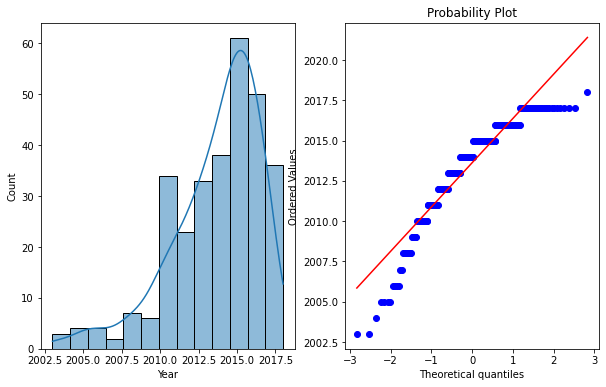

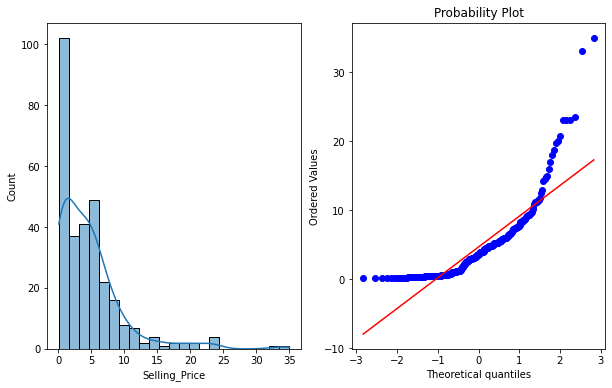

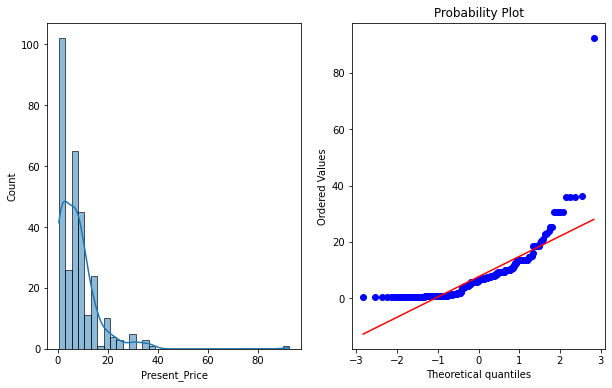

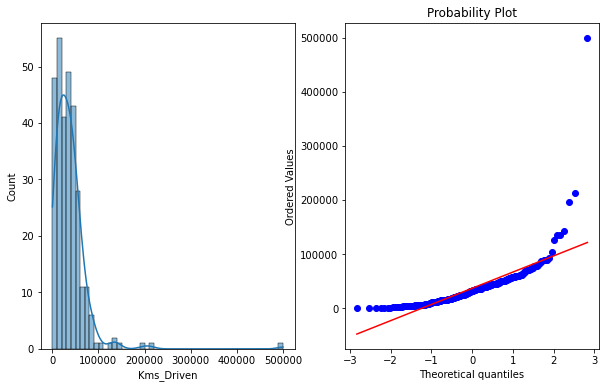

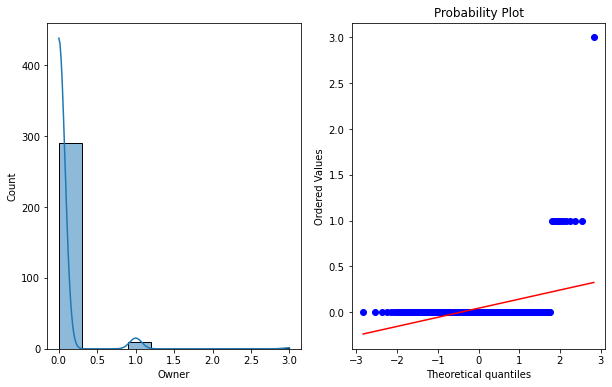

In [63]:
for i in range(len(num)):
    check_dist(df, num[i])

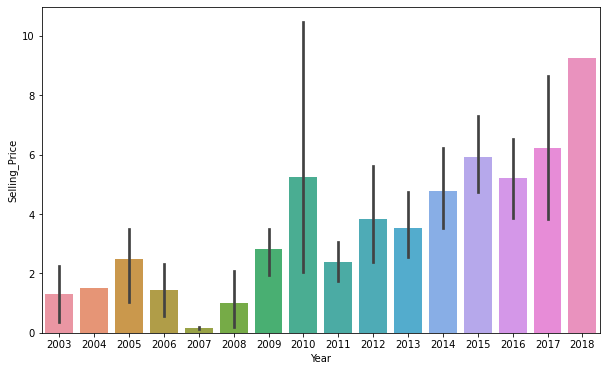

In [64]:
sns.barplot(data=df, x = 'Year', y = 'Selling_Price', orient="v");

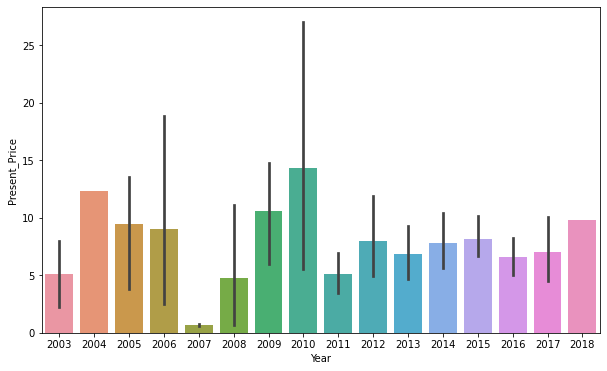

In [65]:
sns.barplot(data=df, x ='Year', y='Present_Price', orient="v");

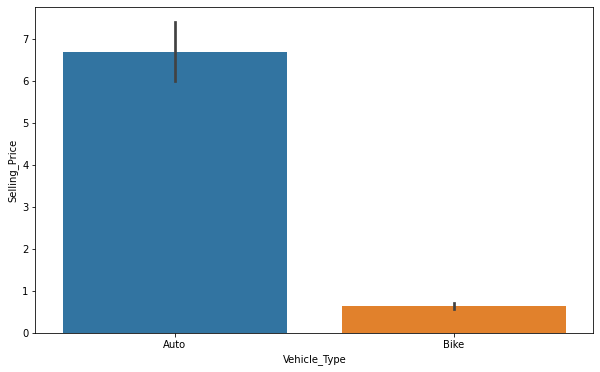

In [40]:
sns.barplot(data = df, y = 'Selling_Price', x = 'Vehicle_Type', orient = "v");

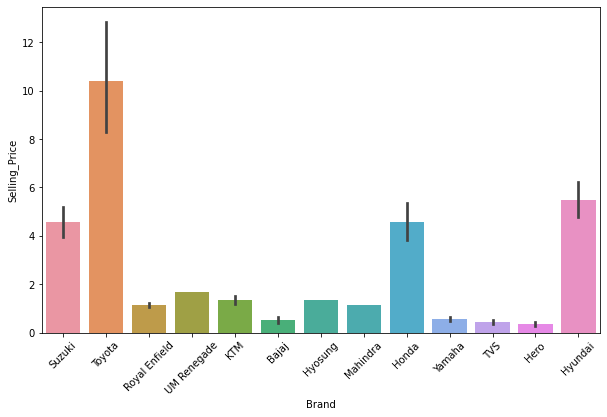

In [41]:
sns.barplot(data = df, y = 'Selling_Price', x = 'Brand', orient = "v")
plt.xticks(rotation=45);

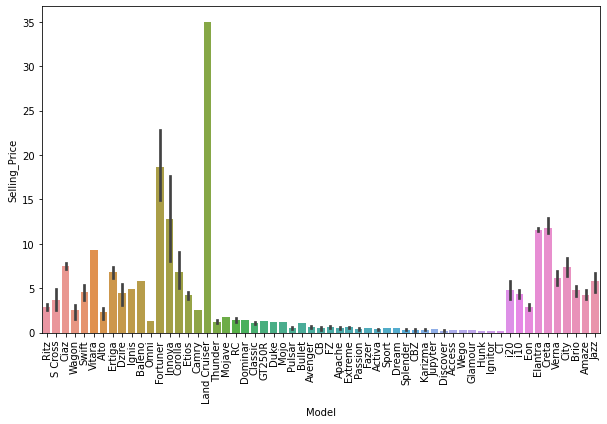

In [42]:
sns.barplot(data = df, y = 'Selling_Price', x = 'Model', orient = "v")
plt.xticks(rotation=90);

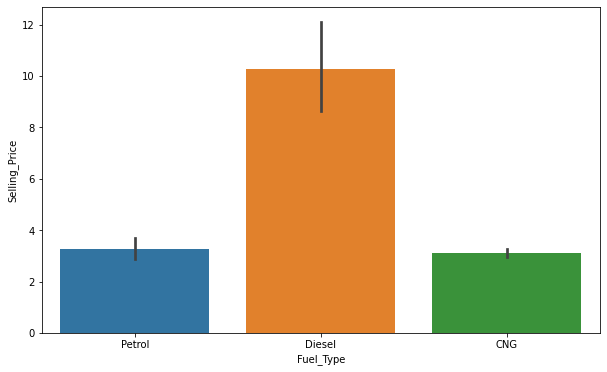

In [43]:
sns.barplot(data = df, y = 'Selling_Price', x = 'Fuel_Type', orient = "v");

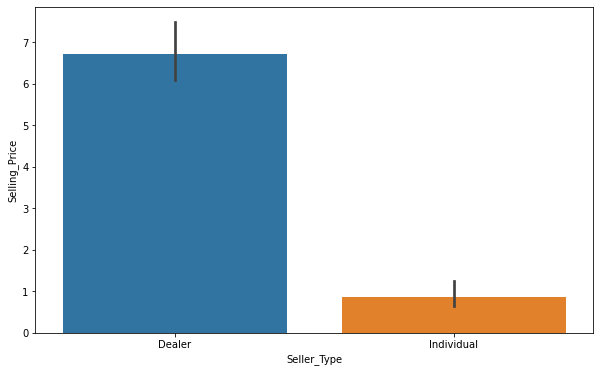

In [44]:
sns.barplot(data = df, y = 'Selling_Price', x = 'Seller_Type', orient = "v");

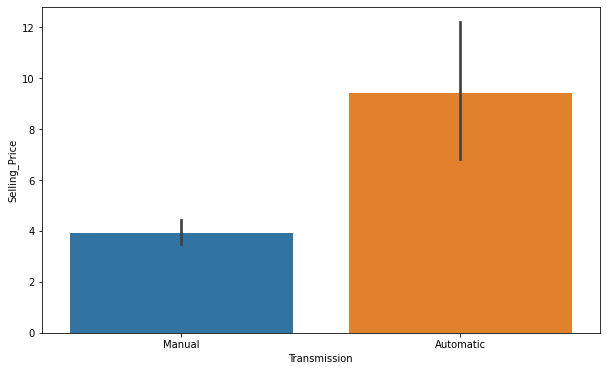

In [45]:
sns.barplot(data = df, y = 'Selling_Price', x = 'Transmission', orient = "v");

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.000,2013.628,2.892,2003.000,2012.000,2014.000,2016.000,2018.000
Selling_Price,301.000,4.661,5.083,0.100,0.900,3.600,6.000,35.000
Present_Price,301.000,7.628,8.644,0.320,1.200,6.400,9.900,92.600
Kms_Driven,301.000,36947.206,38886.884,500.000,15000.000,32000.000,48767.000,500000.000
Owner,301.000,0.043,0.248,0.000,0.000,0.000,0.000,3.000


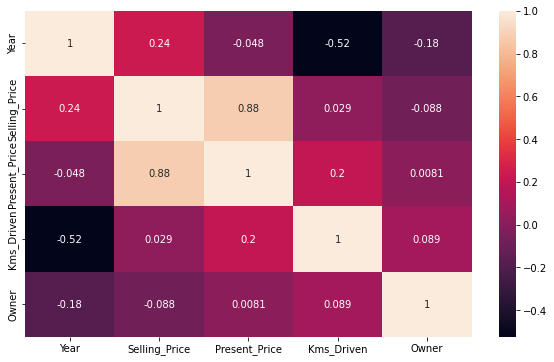

In [47]:
sns.heatmap(df.corr(), annot=True);

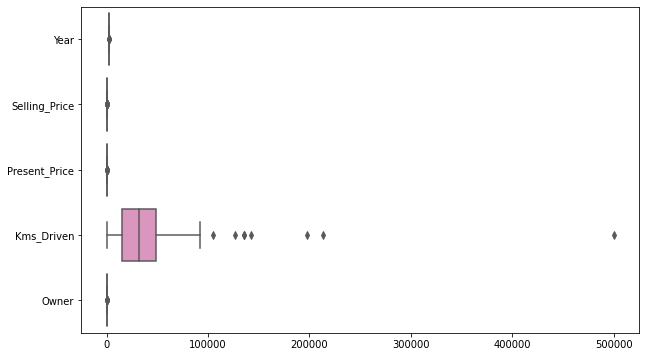

In [48]:
sns.boxplot(data=df, orient="h", palette="Set2");

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


In [49]:
df = df.join(df["Fuel_Type"].str.get_dummies(sep = ",").add_prefix("Fuel_Type_"))
df = df.join(df["Seller_Type"].str.get_dummies(sep = ",").add_prefix("Seller_"))
df = df.join(df["Transmission"].str.get_dummies(sep = ",").add_prefix("Transmission_"))

In [50]:
df.head()

,Vehicle_Type,Brand,Model,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Dealer,Seller_Individual,Transmission_Automatic,Transmission_Manual
0,Auto,Suzuki,Ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0,0,0,1,1,0,0,1
1,Auto,Suzuki,S Cross,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0,0,1,0,1,0,0,1
2,Auto,Suzuki,Ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0,0,0,1,1,0,0,1
3,Auto,Suzuki,Wagon,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0,0,0,1,1,0,0,1
4,Auto,Suzuki,Swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0,0,1,0,1,0,0,1


In [67]:
df.shape

(301, 11)

In [68]:
df = pd.get_dummies(df)

In [76]:
df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [77]:
df 

,year,selling_price,present_price,kms_driven,owner,vehicle_type_auto,vehicle_type_bike,brand_bajaj,brand_hero,brand_honda,brand_hyosung,brand_hyundai,brand_ktm,brand_mahindra,brand_royal_enfield,brand_suzuki,brand_tvs,brand_toyota,brand_um_renegade,brand_yamaha,model_access,model_activa,model_alto,model_amaze,model_apache,model_avenger,model_baleno,model_brio,model_bullet,model_cb,model_cbz,model_ct,model_camry,model_ciaz,model_city,model_classic,model_corolla,model_creta,model_discover,model_dominar,model_dream,model_duke,model_dzire,model_elantra,model_eon,model_ertiga,model_etios,model_extreme,model_fz,model_fazer,model_fortuner,model_gt250r,model_glamour,model_hunk,model_ignis,model_ignitor,model_innova,model_jazz,model_jupyter,model_karizma,model_land_cruiser,model_mojave,model_mojo,model_omni,model_passion,model_pulsar,model_rc,model_ritz,model_s_cross,model_splender,model_sport,model_swift,model_thunder,model_verna,model_vitara,model_wagon,model_wego,model_i10,model_i20,fuel_type_cng,fuel_type_diesel,fuel_type_petrol,seller_type_dealer,seller_type_individual,transmission_automatic,transmission_manual
0,2014,3.350,5.590,27000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
1,2013,4.750,9.540,43000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
2,2017,7.250,9.850,6900,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
3,2011,2.850,4.150,5200,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1
4,2014,4.600,6.870,42450,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1
5,2018,9.250,9.830,2071,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
6,2015,6.750,8.120,18796,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
7,2015,6.500,8.610,33429,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
8,2016,8.750,8.890,20273,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
9,2015,7.450,8.920,42367,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1


In [78]:
df.shape

(301, 86)

In [71]:
print (f'In this study, we have {df.shape[0]} instances with the {df.shape[1]-1} features and 1 target (Label) variable.')

In this study, we have 301 instances with the 85 features and 1 target (Label) variable.


In [75]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_Type_Auto,Vehicle_Type_Bike,Brand_Bajaj,Brand_Hero,Brand_Honda,Brand_Hyosung,Brand_Hyundai,Brand_KTM,Brand_Mahindra,Brand_Royal Enfield,Brand_Suzuki,Brand_TVS,Brand_Toyota,Brand_UM Renegade,Brand_Yamaha,Model_Access,Model_Activa,Model_Alto,Model_Amaze,Model_Apache,Model_Avenger,Model_Baleno,Model_Brio,Model_Bullet,Model_CB,Model_CBZ,Model_CT,Model_Camry,Model_Ciaz,Model_City,Model_Classic,Model_Corolla,Model_Creta,Model_Discover,Model_Dominar,Model_Dream,Model_Duke,Model_Dzire,Model_Elantra,Model_Eon,Model_Ertiga,Model_Etios,Model_Extreme,Model_FZ,Model_Fazer,Model_Fortuner,Model_GT250R,Model_Glamour,Model_Hunk,Model_Ignis,Model_Ignitor,Model_Innova,Model_Jazz,Model_Jupyter,Model_Karizma,Model_Land Cruiser,Model_Mojave,Model_Mojo,Model_Omni,Model_Passion,Model_Pulsar,Model_RC,Model_Ritz,Model_S Cross,Model_Splender,Model_Sport,Model_Swift,Model_Thunder,Model_Verna,Model_Vitara,Model_Wagon,Model_Wego,Model_i10,Model_i20,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.350,5.590,27000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
1,2013,4.750,9.540,43000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
2,2017,7.250,9.850,6900,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
3,2011,2.850,4.150,5200,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1
4,2014,4.600,6.870,42450,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1


### Features and target variable

In [79]:
X = df.drop(columns="selling_price", axis= 1)
y = df['selling_price']

### Splitting data into training and testing

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

##  Model Building (Linear Regression)

In [81]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [82]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")


# Interpret the model

In [83]:
lm = LinearRegression()

lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_score_train = r2_score(y_train, y_train_pred)

y_test_pred = lm.predict(X_test)
rmse_test= np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_score_test = r2_score(y_test, y_test_pred)


print("Train Results")
print('rmse:', rmse_train)
print('r2: ', r2_score_train)

print()

print("Test Results")
print('rmse:', rmse_test)
print('r2: ', r2_score_test)

Train Results
rmse: 1.2819589154508702
r2:  0.9330382177058443

Test Results
rmse: 1.596991028826571
r2:  0.9104318894214666


In [84]:
lm_scores = {"lm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)},
    
    "lm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_test_pred)),
    "mae" : mean_absolute_error(y_test, y_test_pred),
    "mse" : mean_squared_error(y_test, y_test_pred),
    "R2" : r2_score(y_test, y_test_pred)}}

ls =pd.DataFrame(lm_scores)
ls

,lm_train,lm_test
rmse,1.282,1.597
mae,0.760,1.098
mse,1.643,2.550
R2,0.933,0.910


In [63]:
pd.concat([ls], axis=1)

,lm_train,lm_test
rmse,1.282,1.597
mae,0.760,1.098
mse,1.643,2.550
R2,0.933,0.910


## Multicolineratiy

In [87]:
 #def color_red(val):
    
    if val > 0.90 and val < 0.99:
          color = 'red'
    else:
            color = 'black'
    return f'color: {color}'

In [88]:
 #pd.DataFrame(poly_features).corr().style.applymap(color_red)

NameError: name 'poly_features' is not defined

# Model Evaluation (Cross_Validate)

In [89]:
from sklearn.model_selection import cross_validate, cross_val_score
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)


In [90]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.009,0.008,-1.075,-2.603,-27.321,-5.227
2,0.008,0.005,0.614,-1.884,-25.994,-5.098
3,0.008,0.007,0.924,-0.791,-0.950,-0.975
4,0.010,0.008,0.012,-2.423,-24.772,-4.977
5,0.010,0.006,0.881,-0.627,-0.613,-0.783
6,0.010,0.008,0.873,-0.985,-2.176,-1.475
7,0.011,0.007,0.849,-1.181,-7.198,-2.683
8,0.010,0.007,0.620,-1.325,-6.446,-2.539
9,0.009,0.008,0.894,-1.215,-2.548,-1.596
10,0.009,0.007,0.909,-0.735,-0.897,-0.947


In [91]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             0.550
test_neg_mean_absolute_error       -1.377
test_neg_mean_squared_error        -9.892
test_neg_root_mean_squared_error   -2.630
dtype: float64

In [92]:
eval_metrics(y_test, y_test_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9104318894214666
MAE 		: 1.097705605444216
MSE 		: 2.5503803461525494
RMSE 		: 1.596991028826571


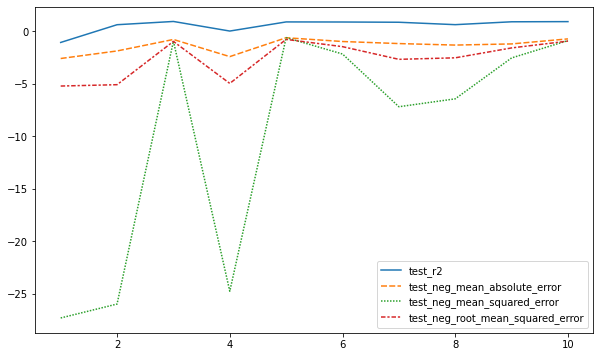

In [93]:
sns.lineplot(data = scores.iloc[:,2:]);

In [94]:
lm.coef_

array([ 3.49537863e-01,  7.00894994e-01, -2.55311352e-06, -1.55019306e-01,
       -9.53186811e-01,  9.53186811e-01,  1.87463749e-01,  7.95322219e-01,
        9.50670534e-01, -3.23719768e-01,  1.64368063e+00, -2.41601586e-01,
       -1.48325796e-13,  2.50891808e-01,  1.55059227e+00,  2.83498789e-01,
       -5.11480267e+00, -5.59552404e-14,  1.80040181e-02,  5.45850227e-01,
       -3.60330591e-01,  5.91150114e-01,  2.16349258e-01,  1.29609600e-01,
       -3.03029888e-01, -1.32960363e-01,  1.06968774e+00, -4.81193479e-01,
       -6.02670104e-01, -4.20774526e-14, -3.99680289e-14, -3.33627548e+00,
       -2.24005116e-02, -1.68525655e-01,  5.51282574e-01,  2.83118879e+00,
        1.40188444e+00,  5.67111428e-01, -6.80943076e-01, -4.78506124e-14,
       -4.91720898e-02, -5.49540385e-01,  4.84147160e-01, -5.20776713e-01,
       -2.71032406e-01,  5.93747058e+00, -5.35127361e-01,  1.80040181e-02,
       -6.92779167e-14,  3.89015865e+00, -3.23719768e-01, -3.25835944e-01,
        1.82939596e+00,  

In [95]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,0.350
1,0.701
2,-0.000
3,-0.155
4,-0.953
5,0.953
6,0.187
7,0.795
8,0.951
9,-0.324


In [96]:
len(lm.coef_)

85

# Regularization

**Polynomial Conversion**

In [97]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

poly_features = polynomial_converter.fit_transform(X)

# Ridge

**With Ridge**

In [101]:
from sklearn.linear_model import Ridge

In [102]:
ridge_model = Ridge(alpha=1)

In [103]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

In [104]:
y_train_pred = ridge_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.922629277831828
MAE 		: 0.8642530066092756
MSE 		: 1.8988814852660816
RMSE 		: 1.3779990875418175


In [105]:
y_test_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_test_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9071497788192514
MAE 		: 1.1290351528262614
MSE 		: 2.6438358217645854
RMSE 		: 1.6259876450221218


In [80]:
ridge_scores = {"ridge_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_test_pred)),
    "mae" : mean_absolute_error(y_test, y_test_pred),
    "mse" : mean_squared_error(y_test, y_test_pred),
    "R2" : r2_score(y_test, y_test_pred)}}
rs = pd.DataFrame(ridge_scores)
rs

,ridge_train,ridge_test
rmse,1.378,1.627
mae,0.864,1.132
mse,1.898,2.646
R2,0.923,0.907


In [81]:
pd.concat([ls, rs], axis=1)

,lm_train,lm_test,ridge_train,ridge_test
rmse,1.282,1.597,1.378,1.627
mae,0.760,1.098,0.864,1.132
mse,1.643,2.550,1.898,2.646
R2,0.933,0.910,0.923,0.907


**With RidgeCV**

In [82]:
ridgecv  = RidgeCV(alphas = 10**np.linspace(10,-2,100)*0.5, scoring = "neg_mean_squared_error", 
                   cv = 10, normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train, y_train)

y_train_pred = ridge_tuned.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_score_train = r2_score(y_train, y_train_pred)

y_test_pred = ridge_tuned.predict(X_test)
rmse_test= np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_score_test = r2_score(y_test, y_test_pred)


print("Optimal lambda: " ,ridgecv.alpha_)

print()

print("Train Results")
print('rmse:', rmse_train)
print('r2: ', r2_score_train)

print()

print("Test Results")
print('rmse:', rmse_test)
print('r2: ', r2_score_test)

Optimal lambda:  0.24885117821660568

Train Results
rmse: 1.331614973162582
r2:  0.9277502863325577

Test Results
rmse: 1.5996154576138064
r2:  0.9101372624990701


In [83]:
ridgecv_scores = {"ridgecv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)},
    
    "ridgecv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_test_pred)),
    "mae" : mean_absolute_error(y_test, y_test_pred),
    "mse" : mean_squared_error(y_test, y_test_pred),
    "R2" : r2_score(y_test, y_test_pred)}}

rcvs =pd.DataFrame(ridgecv_scores)
rcvs

,ridgecv_train,ridgecv_test
rmse,1.332,1.600
mae,0.798,1.120
mse,1.773,2.559
R2,0.928,0.910


In [84]:
pd.concat([ls, rs, rcvs], axis=1)

,lm_train,lm_test,ridge_train,ridge_test,ridgecv_train,ridgecv_test
rmse,1.282,1.597,1.378,1.627,1.332,1.600
mae,0.760,1.098,0.864,1.132,0.798,1.120
mse,1.643,2.550,1.898,2.646,1.773,2.559
R2,0.933,0.910,0.923,0.907,0.928,0.910


# Lasso

**With Lasso**

In [106]:
from sklearn.linear_model import Lasso, LassoCV

In [107]:
lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

In [108]:
y_train_pred = lasso_model.predict(X_train)

In [109]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8356651722276249
MAE 		: 1.230776891089614
MSE 		: 4.033209889951397
RMSE 		: 2.008285310893698


In [110]:
y_test_pred = lasso_model.predict(X_test)

In [111]:
eval_metrics(y_test, y_test_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8396199056735947
MAE 		: 1.456700634868869
MSE 		: 4.5666949748316705
RMSE 		: 2.1369826800495297


In [91]:
lasso_scores = {"lasso_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_test_pred)),
    "mae" : mean_absolute_error(y_test, y_test_pred),
    "mse" : mean_squared_error(y_test, y_test_pred),
    "R2" : r2_score(y_test, y_test_pred)}}
lss = pd.DataFrame(lasso_scores)
lss

,lasso_train,lasso_test
rmse,2.008,2.137
mae,1.231,1.457
mse,4.033,4.567
R2,0.836,0.840


In [92]:
pd.concat([ls, rs, rcvs, lss], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridgecv_train,ridgecv_test,lasso_train,lasso_test
rmse,1.282,1.597,1.378,1.627,1.332,1.600,2.008,2.137
mae,0.760,1.098,0.864,1.132,0.798,1.120,1.231,1.457
mse,1.643,2.550,1.898,2.646,1.773,2.559,4.033,4.567
R2,0.933,0.910,0.923,0.907,0.928,0.910,0.836,0.840


**With LassoCV**

In [93]:
lassocv  = LassoCV(alphas = 10**np.linspace(10,-2,100)*0.5, max_iter=100000, cv = 10, normalize = True)
lassocv.fit(X_train, y_train)
lassocv.alpha_

lasso_tuned = Lasso(alpha = lassocv.alpha_).fit(X_train, y_train)

y_train_pred = lasso_tuned.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_score_train = r2_score(y_train, y_train_pred)

y_test_pred = lasso_tuned.predict(X_test)
rmse_test= np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_score_test = r2_score(y_test, y_test_pred)


print("Optimal lambda: " , lassocv.alpha_)

print()

print("Train Results")
print('rmse:', rmse_train)
print('r2: ', r2_score_train)

print()

print("Test Results")
print('rmse:', rmse_test)
print('r2: ', r2_score_test)

Optimal lambda:  0.020185086292982747

Train Results
rmse: 1.490468772339198
r2:  0.9094841668638116

Test Results
rmse: 1.6847459563988423
r2:  0.9003178709209569


In [94]:
lasso_scores = {"lasso_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_test_pred)),
    "mae" : mean_absolute_error(y_test, y_test_pred),
    "mse" : mean_squared_error(y_test, y_test_pred),
    "R2" : r2_score(y_test, y_test_pred)}}
lcvs = pd.DataFrame(lasso_scores)
lcvs


,lasso_cv_train,lasso_cv_test
rmse,1.490,1.685
mae,0.996,1.161
mse,2.221,2.838
R2,0.909,0.900


In [95]:
pd.concat([ls, rs, rcvs, lss, lcvs], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridgecv_train,ridgecv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
rmse,1.282,1.597,1.378,1.627,1.332,1.600,2.008,2.137,1.490,1.685
mae,0.760,1.098,0.864,1.132,0.798,1.120,1.231,1.457,0.996,1.161
mse,1.643,2.550,1.898,2.646,1.773,2.559,4.033,4.567,2.221,2.838
R2,0.933,0.910,0.923,0.907,0.928,0.910,0.836,0.840,0.909,0.900


## Elastic-Net 

**With Elastic**

In [96]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [97]:
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)

ElasticNet()

In [98]:
elastic_model.l1_ratio

0.5

In [99]:
elastic_model.alpha

1.0

In [100]:
y_train_pred = elastic_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8393598698919211
MAE 		: 1.2232761256943647
MSE 		: 3.9425322693762848
RMSE 		: 1.9855810911106815


In [101]:
y_test_pred = elastic_model.predict(X_test)
eval_metrics(y_test, y_test_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8460244412267114
MAE 		: 1.4321927972513337
MSE 		: 4.384330944872789
RMSE 		: 2.0938794007470416


In [102]:
elastic_scores = {"elastic_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_test_pred)),
    "mae" : mean_absolute_error(y_test, y_test_pred),
    "mse" : mean_squared_error(y_test, y_test_pred),
    "R2" : r2_score(y_test, y_test_pred)}}
es = pd.DataFrame(elastic_scores)
es

,elastic_train,elastic_test
rmse,1.986,2.094
mae,1.223,1.432
mse,3.943,4.384
R2,0.839,0.846


In [103]:
pd.concat([ls, rs, rcvs, lss, lcvs, es], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridgecv_train,ridgecv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
rmse,1.282,1.597,1.378,1.627,1.332,1.600,2.008,2.137,1.490,1.685,1.986,2.094
mae,0.760,1.098,0.864,1.132,0.798,1.120,1.231,1.457,0.996,1.161,1.223,1.432
mse,1.643,2.550,1.898,2.646,1.773,2.559,4.033,4.567,2.221,2.838,3.943,4.384
R2,0.933,0.910,0.923,0.907,0.928,0.910,0.836,0.840,0.909,0.900,0.839,0.846


**With ElasticCV**

In [104]:
enet_cv  = ElasticNetCV(alphas = 10**np.linspace(10,-2,100)*0.5, l1_ratio=[.1,.2,.3,.5,.7,.8,.9,1], 
                        max_iter=100000, cv = 10, normalize = True)

enet_cv.fit(X_train, y_train)
enet_cv.alpha_

enet_tuned = ElasticNet(alpha = enet_cv.alpha_, l1_ratio=enet_cv.l1_ratio_).fit(X_train, y_train)

y_train_pred = enet_tuned.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_score_train = r2_score(y_train, y_train_pred)

y_test_pred = enet_tuned.predict(X_test)
rmse_test= np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_score_test = r2_score(y_test, y_test_pred)


print('Optimal lambda: ', enet_cv.alpha_)
print("Optimal l1_ratio", enet_cv.l1_ratio_)

print()

print("Train Results")
print('rmse:', rmse_train)
print('r2: ', r2_score_train)

print()

print("Test Results")
print('rmse:', rmse_test)
print('r2: ', r2_score_test)

Optimal lambda:  0.006609705742330144
Optimal l1_ratio 0.9

Train Results
rmse: 1.3779563583392302
r2:  0.9226340760033731

Test Results
rmse: 1.6200748868434605
r2:  0.9078238340128311


In [105]:
elastic_cv_scores = {"elastic_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_test_pred)),
    "mae" : mean_absolute_error(y_test, y_test_pred),
    "mse" : mean_squared_error(y_test, y_test_pred),
    "R2" : r2_score(y_test, y_test_pred)}}
ecvs = pd.DataFrame(elastic_cv_scores)
ecvs

,elastic_cv_train,elastic_cv_test
rmse,1.378,1.620
mae,0.884,1.117
mse,1.899,2.625
R2,0.923,0.908


In [106]:
pd.concat([ls,rs, rcvs, lss, lcvs, es, ecvs], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridgecv_train,ridgecv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
rmse,1.282,1.597,1.378,1.627,1.332,1.600,2.008,2.137,1.490,1.685,1.986,2.094,1.378,1.620
mae,0.760,1.098,0.864,1.132,0.798,1.120,1.231,1.457,0.996,1.161,1.223,1.432,0.884,1.117
mse,1.643,2.550,1.898,2.646,1.773,2.559,4.033,4.567,2.221,2.838,3.943,4.384,1.899,2.625
R2,0.933,0.910,0.923,0.907,0.928,0.910,0.836,0.840,0.909,0.900,0.839,0.846,0.923,0.908


## Grid Search

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
elastic_model = ElasticNet(max_iter=100000)

In [109]:
param_grid ={"alpha":[0.01, 0.02, 0.1, 1, 5, 10, 50, 100],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [110]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [111]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 56 candidates, totalling 560 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=100000),
             param_grid={'alpha': [0.01, 0.02, 0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [112]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.1}

In [113]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013,0.002,0.003,0.001,0.010,0.100,"{'alpha': 0.01, 'l1_ratio': 0.1}",-3.198,-4.203,-0.959,-2.362,-0.692,-1.152,-2.955,-1.935,-1.406,-1.157,-2.002,1.091,16
1,0.015,0.006,0.004,0.001,0.010,0.500,"{'alpha': 0.01, 'l1_ratio': 0.5}",-3.307,-4.206,-0.952,-2.316,-0.673,-1.131,-2.959,-1.934,-1.419,-1.164,-2.006,1.107,17
2,0.018,0.008,0.004,0.001,0.010,0.700,"{'alpha': 0.01, 'l1_ratio': 0.7}",-3.434,-4.184,-0.939,-2.316,-0.669,-1.126,-2.956,-1.939,-1.445,-1.177,-2.018,1.117,18
3,0.032,0.013,0.003,0.000,0.010,0.900,"{'alpha': 0.01, 'l1_ratio': 0.9}",-3.656,-4.233,-0.909,-2.340,-0.688,-1.113,-2.950,-1.970,-1.490,-1.181,-2.053,1.155,20
4,0.034,0.012,0.003,0.001,0.010,0.950,"{'alpha': 0.01, 'l1_ratio': 0.95}",-3.737,-4.257,-0.899,-2.380,-0.697,-1.106,-2.947,-2.002,-1.509,-1.188,-2.072,1.171,22
5,0.012,0.004,0.003,0.000,0.010,0.990,"{'alpha': 0.01, 'l1_ratio': 0.99}",-3.828,-4.284,-0.893,-2.473,-0.707,-1.096,-2.940,-2.073,-1.523,-1.192,-2.101,1.190,27
6,0.018,0.006,0.004,0.001,0.010,1,"{'alpha': 0.01, 'l1_ratio': 1}",-3.859,-4.293,-0.894,-2.517,-0.710,-1.093,-2.939,-2.106,-1.523,-1.192,-2.113,1.197,28
7,0.014,0.006,0.004,0.001,0.020,0.100,"{'alpha': 0.02, 'l1_ratio': 0.1}",-2.877,-3.991,-1.023,-2.279,-0.693,-1.114,-3.012,-1.888,-1.370,-1.120,-1.937,1.021,3
8,0.010,0.002,0.004,0.003,0.020,0.500,"{'alpha': 0.02, 'l1_ratio': 0.5}",-2.856,-4.076,-1.012,-2.215,-0.684,-1.091,-3.045,-1.880,-1.372,-1.129,-1.936,1.041,2
9,0.012,0.003,0.003,0.000,0.020,0.700,"{'alpha': 0.02, 'l1_ratio': 0.7}",-2.842,-4.129,-0.997,-2.186,-0.681,-1.083,-3.066,-1.877,-1.372,-1.147,-1.938,1.054,4


In [114]:
new_model = ElasticNet(alpha =0.1, l1_ratio=0.1)

In [115]:
new_model

ElasticNet(alpha=0.1, l1_ratio=0.1)

## Using Best Model From GridSearch

In [116]:
y_test_pred = grid_model.predict(X_test)

In [117]:
eval_metrics(y_test, y_test_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8873918931358273
MAE 		: 1.1964889822078206
MSE 		: 3.206425821744003
RMSE 		: 1.7906495530237074
